# D - *Forstbotanischer Garten* Stations

The present notebook makes use of a metereological dataset made publicly available by the **Forstbotanischer Garten Eberswalde**, the Forest Botanical Garden of the **HNEE**.

The website of the Garden has further informations about the garden:
https://www.hnee.de/en/University/Central-Facilities/Forest-Botanical-Garden/Forstbotanischer-Garten-Eberswalde-E2168.htm?cb=1570965070

The dataset itself can be accessed as tables under the Menu *Stationen* on the website:
http://fobo.hnee.de/

The examples in this notebook use all (7) variables from 6 meteorological stations at the botanical garden. The examples aim at:
* Analizing a scree plot and discussing the pertinence of performing dimension reduction
* Showing the result of the data projection into the principal components
* Showing 2 applications of the PCA decomposition:
    * Filtering data, by reconstructing it from the projection
    * Component plots, as a base for *clustering* into classes

## Import libraries

In [50]:
# To have interactive plots
%matplotlib notebook 

# To have static plots
# %matplotlib inline

import numpy
import pandas
from matplotlib import pyplot

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

numpy.set_printoptions( precision=4, suppress=True )

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Read data

The current dataset from the forest botanical garden Eberswalde, `foboga.csv`, comprises 6 months of measurements taken simultaneously at 6 stations, as follows:
    
1. Buche Jungbestand - Young beech (*Fagus sylvatica*)
1. Buche Altbestand - Old beech (*Fagus sylvatica*)
1. Kiefer Jungbestand - Young pine (*Pinus*)
1. Waldlichtung - Clearing, glade
1. Kiefer-Buche-Mischbestand - Mixed beech and pine
1. Kiefer Altbestand - Old pine
1. Experimental station, lysimeters

The measured variables are:
    
* Timestamp of the measurement
* Air temperature at 2m height
* Relative humidity at 2m height
* PAR radiation at 2m height
* Soil temperature at 25cm depth
* Soil moisture at 25cm depth
* Soil temperature at 55cm depth
* Soil moisture at 55cm depth

The measurements were taken in the second semester of 2010: July 1st until December 31st.

In [52]:
df = pandas.read_csv( '../data/foboga.csv', parse_dates=['Timestamp'] )
df.set_index( ['Timestamp'], inplace=True, drop=True )

In [53]:
datacols = [ 'Temperature (2m)', 'Humidity (2m)', 'PAR Radiation (2m)',
             'Temperature (-0.25m)', 'Soil moisture (-0.25m)',
             'Temperature (-0.55m)', 'Soil moisture (-0.55m)' ]

In [54]:
data = df[ datacols ].values

## PCA

### Scaling

In [55]:
scaler = StandardScaler()
scaler.fit( data )
# print( scaler.mean_, scaler.var_ ) # Uncomment to verify the values used by the scaler
scaled_data = scaler.transform( data )

### PCA transformation

In [56]:
pca = PCA()
pca.fit( scaled_data ) # The function expects variables to be rows!

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [57]:
pca.components_

array([[ 0.4812, -0.3313,  0.2164,  0.467 , -0.3348,  0.4573, -0.2695],
       [ 0.119 , -0.1985,  0.5957,  0.0662,  0.5126,  0.0885,  0.5626],
       [-0.1404, -0.5458,  0.4492, -0.3928, -0.2088, -0.4109, -0.3374],
       [-0.1723,  0.5725,  0.5161,  0.0659,  0.2324,  0.1317, -0.5482],
       [ 0.1272, -0.3639, -0.359 ,  0.0147,  0.7253,  0.0278, -0.4421],
       [-0.8264, -0.3045, -0.0294,  0.2682, -0.0252,  0.3875,  0.0288],
       [-0.0765,  0.0037,  0.0205,  0.7394,  0.0287, -0.6679, -0.0122]])

In [58]:
pca.explained_variance_

array([3.752 , 1.2049, 1.0507, 0.5197, 0.3591, 0.1059, 0.008 ])

In [59]:
pca.explained_variance_ratio_

array([0.536 , 0.1721, 0.1501, 0.0742, 0.0513, 0.0151, 0.0011])

In [60]:
pca.explained_variance_ratio_.cumsum()

array([0.536 , 0.7081, 0.8582, 0.9324, 0.9837, 0.9989, 1.    ])

For the complete dataset, 3 components account for 85.8% of the total variance.

### Scree plot

<IPython.core.display.Javascript object>


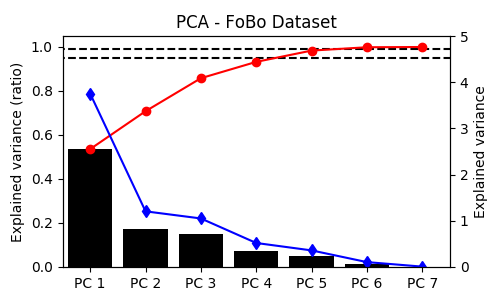

In [61]:
fig, ax = pyplot.subplots( nrows=1, ncols=1, figsize=(5,3) )

ax.bar( list( range( 7 )), pca.explained_variance_ratio_, color='black', label='Ratio of explained variance' )
ax.plot( list( range( 7 )), pca.explained_variance_ratio_.cumsum(), '-', marker='o', color='red', label='Cummulative ratio of explained variance' )
ax.hlines( 0.95, -1, 8, linestyle='--', color='black' )
ax.hlines( 0.99, -1, 8, linestyle='--', color='black' )

axR = ax.twinx()
axR.yaxis.tick_right()
axR.plot( list( range( 7 )), pca.explained_variance_, '-', marker='d', color='blue', label='Explained variance' )
axR.set_ylim( [0,5] )

ax.set_xticks( list( range( 7 )) )
ax.set_xticklabels( ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7'] )

ax.set_ylabel( 'Explained variance (ratio)' )
axR.set_ylabel( 'Explained variance' )
#axR.legend( loc='center right' )

ax.set_xlim( [-0.5, 6.5] )
pyplot.title( 'PCA - FoBo Dataset' )
#pypplpot.savefig( './scree/Station ' + str(station_n) + '_scree.png' )

pyplot.show()

### Data transformation (projection into new axes)

The matrix of components (`pca.components_`) defines a transformation matrix that maps the original data into a new space. If all components are used in this transformation matrix, then the dimensions of the transformed data are the same as the original.

In [13]:
projected_data = pca.transform( data )
print( projected_data.shape )

(26496, 7)


In [14]:
df_projected = pandas.DataFrame( projected_data, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7'] )
df_projected.shape

(26496, 7)

In [15]:
df_projected[ 'Station' ] = df[ 'Station' ].values
df_projected.index = df.index
df_projected.shape

(26496, 8)

In [16]:
#fig, ax = pyplot.subplots( figsize=(7,3) ) # Uncomment to plot individual components
#ax.plot( df_projected['PC 7'] )
#pyplot.show()

In [17]:
df_projected.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,Station
Timestamp,,,,,,,,
2010-07-01 00:00:00,-13.167484,-1.079219,-63.704756,46.489155,-27.507194,-30.181186,1.839435,1
2010-07-01 01:00:00,-15.333555,-2.178461,-66.316037,49.632752,-29.517007,-30.895358,1.923803,1
2010-07-01 02:00:00,-16.054603,-2.626220,-67.111216,50.430330,-30.034713,-30.971387,1.936542,1
2010-07-01 03:00:00,-16.704746,-3.051416,-68.133298,51.423594,-30.663841,-31.479742,1.923519,1
2010-07-01 04:00:00,-16.323881,-1.421455,-67.235854,53.451783,-32.044951,-31.826691,1.959292,1


In [18]:
df_projected.tail()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,Station
Timestamp,,,,,,,,
2010-12-31 19:00:00,-40.726943,-4.124235,-68.138900,58.287417,-32.510238,-29.504606,0.547082,6
2010-12-31 20:00:00,-40.727641,-4.130589,-68.123245,58.257641,-32.491046,-29.475312,0.548056,6
2010-12-31 21:00:00,-40.713836,-4.140884,-68.142181,58.254714,-32.496900,-29.513911,0.544577,6
2010-12-31 22:00:00,-40.575612,-4.066002,-68.091631,58.177201,-32.437550,-29.659257,0.535882,6
2010-12-31 23:00:00,-40.322944,-3.956462,-67.795271,57.836747,-32.228592,-29.587694,0.524185,6


## Using PCA to filter data

The process of using PCA to filter noisy data is the following:
1. Scale if needed
1. Calculate the principal components of the dataset and select the first $n$
    * 2 or 3 if you want to plot
    * use the scree plot for orientation
    * more elaborated criteria on how to select a number of components can be found in Statistical Methods in the Atmospheric Sciences by Daniel S. Wilks
1. Project the data into the components coordinate system
1. Reconstruct the original data (project back into the original axes) using only the first $n$ columns
1. Scale back to the original dimensions

**Note**: It is possible to truncate the components before or after the projection!

This method gives a second representation of the whole table, ignores some of the new variables (last components) and reconstructs the data with the inverse transformation.

In [19]:
datacols = [ 'Temperature (2m)', 'Humidity (2m)', 'PAR Radiation (2m)',
             'Temperature (-0.25m)', 'Soil moisture (-0.25m)',
             'Temperature (-0.55m)', 'Soil moisture (-0.55m)' ]

In [20]:
data = df[ datacols ].values

### Scaling

In [21]:
scaler = StandardScaler()
scaler.fit( data )
# print( scaler.mean_, scaler.var_ )
scaled_data = scaler.transform( data )

### PCA transformation

The following line constructs a pca object set to work with only the first 3 principal components.

It is also possible to use all components, and later on truncate them before the transformations. In this case, the library takes care of the dimensions before carrying out the matrix multiplications.

In [22]:
pca = PCA( n_components=3 )
pca.fit( scaled_data ) # The function expects variables to be rows!

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca.components_

array([[ 0.4812, -0.3313,  0.2164,  0.467 , -0.3348,  0.4573, -0.2695],
       [ 0.119 , -0.1985,  0.5957,  0.0662,  0.5126,  0.0885,  0.5626],
       [-0.1404, -0.5458,  0.4492, -0.3928, -0.2088, -0.4109, -0.3374]])

In [24]:
pca.explained_variance_

array([3.752 , 1.2049, 1.0507])

In [25]:
pca.explained_variance_ratio_

array([0.536 , 0.1721, 0.1501])

In [26]:
pca.explained_variance_ratio_.cumsum()

array([0.536 , 0.7081, 0.8582])

The following is the filtering itself: project to the components as axes and back in the original space.
    
Previously, 3 components were set in the call to `pca.fit()`. Therefore, the transformation *filters* the information automatically.

This is a technique widely used to filter images.

### Filtering

In [27]:
projected_data = pca.transform( scaled_data )

filtered_data = pca.inverse_transform( projected_data )

print( 'Shape of the filtered (reconstructed) data: ', filtered_data.shape )

Shape of the filtered (reconstructed) data:  (26496, 7)


In [28]:
projected_data

array([[ 1.5137, -0.8759, -0.0409],
       [ 1.352 , -0.9564, -0.2086],
       [ 1.2989, -0.9824, -0.2531],
       ...,
       [-2.6409, -0.3678,  0.65  ],
       [-2.6298, -0.3626,  0.6515],
       [-2.6093, -0.3576,  0.6717]])

### Scaling back

In [29]:
filtered_data = scaler.inverse_transform( filtered_data )

In [30]:
df_filtered = pandas.DataFrame( filtered_data, columns=df.columns[:7] )
df_filtered[ 'Station' ] = df[ 'Station' ].values
df_filtered.index = df.index
df_filtered.head()

,Temperature (2m),Humidity (2m),PAR Radiation (2m),Temperature (-0.25m),Soil moisture (-0.25m),Temperature (-0.55m),Soil moisture (-0.55m),Station
Timestamp,,,,,,,,
2010-07-01 00:00:00,14.928891,86.296414,13.073067,14.290897,10.921906,13.540981,8.249136,1
2010-07-01 01:00:00,14.317739,88.744429,-9.963268,14.219694,11.129665,13.492710,8.464096,1
2010-07-01 02:00:00,14.103386,89.459382,-16.799630,14.176729,11.189283,13.459807,8.521683,1
2010-07-01 03:00:00,13.963432,90.280717,-24.478155,14.193107,11.254583,13.477514,8.597044,1
2010-07-01 04:00:00,13.934931,90.514607,-26.105711,14.204685,11.296173,13.489332,8.642297,1


### Plots of the filtered data

<IPython.core.display.Javascript object>


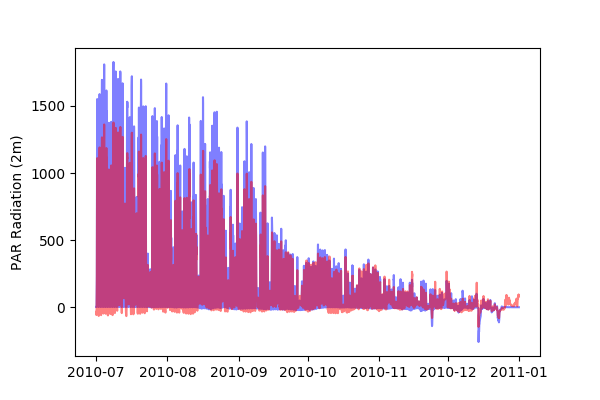

In [62]:
fig, ax = pyplot.subplots( figsize=(6,4) )

station_n = 4
#col = 'Temperature (2m)'
#col = 'Humidity (2m)'
col = 'PAR Radiation (2m)'
#col = 'Temperature (-0.25m)'
#col = 'Soil moisture (-0.25m)'
#col = 'Temperature (-0.55m)'
#col = 'Soil moisture (-0.55m)'

dfq = df[ df['Station']==station_n ]
ax.plot( dfq.index, dfq[col], color='blue', alpha=0.5 )

dfq = df_filtered[ df_filtered['Station']==station_n ]
ax.plot( dfq.index, dfq[col], color='red', alpha=0.5 )

ax.set_ylabel( col )

pyplot.show()

<IPython.core.display.Javascript object>


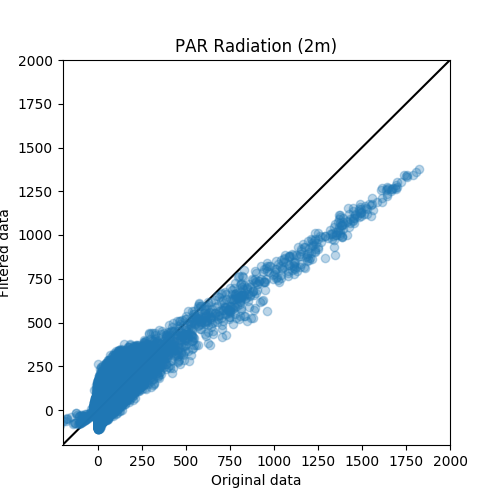

In [63]:
fig, ax = pyplot.subplots( figsize=(5,5) )

ax.plot( [-1000, 2000], [-1000, 2000], color='black', zorder=-1 )
ax.scatter( df[col], df_filtered[col], marker='o', alpha=0.3 )
ax.set_xlim( [-200, 2000] )
ax.set_ylim( [-200, 2000] )

ax.set_xlabel( 'Original data' )
ax.set_ylabel( 'Filtered data' )

ax.set_title( col )

pyplot.show()

In [33]:
pyplot.close('all')

## Using PCA to look for similarities

The transformation of the data in the coordinate system defined by the components in PCA is driven by the variance in each axis. This variance is maximized, which often allows to see groups of points "clumped" together if we plot the transformed data using the first components as axes. These groups of points often relate to actual characteristics in the data, which not necessesarily are known. In other words, PCA can help to find groups of points that "belong together". 

In the following example, we perform a PCA over the complete dataset again, but instead of converting back to the original dimensions, we plot the data over the first 3 components using different colors for each experimental station. We will be able to see to which extent the overall microclimate was similar between the measuring points.

In [34]:
datacols = [ 'Temperature (2m)', 'Humidity (2m)', 'PAR Radiation (2m)',
             'Temperature (-0.25m)', 'Soil moisture (-0.25m)',
             'Temperature (-0.55m)', 'Soil moisture (-0.55m)' ]

In [35]:
data = df[ datacols ].values

#### Scaling

In [36]:
scaler = StandardScaler()
scaler.fit( data )
# print( scaler.mean_, scaler.var_ )
scaled_data = scaler.transform( data )

#### PCA transformation

Again, we select 3 components to keep. The reason in this case is that we want to visualize the point cloud in 3D to look for groups. From the previous example, we know that the joint variance explained by the first 3 principal components amounts to 85% of the total.

In [37]:
pca = PCA( n_components=3 )
pca.fit( scaled_data ) # The function expects variables to be rows!

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
pca.components_

array([[ 0.4812, -0.3313,  0.2164,  0.467 , -0.3348,  0.4573, -0.2695],
       [ 0.119 , -0.1985,  0.5957,  0.0662,  0.5126,  0.0885,  0.5626],
       [-0.1404, -0.5458,  0.4492, -0.3928, -0.2088, -0.4109, -0.3374]])

In [39]:
pca.explained_variance_

array([3.752 , 1.2049, 1.0507])

In [40]:
pca.explained_variance_ratio_

array([0.536 , 0.1721, 0.1501])

In [41]:
pca.explained_variance_ratio_.cumsum()

array([0.536 , 0.7081, 0.8582])

#### Projected data

In [42]:
projected_data = pca.transform( scaled_data )

print( 'Shape of the filtered (reconstructed) data: ', projected_data.shape )

Shape of the filtered (reconstructed) data:  (26496, 3)


In [43]:
df_projected = pandas.DataFrame( projected_data, columns=['PC 1', 'PC 2', 'PC 3' ] )
df_projected.shape

(26496, 3)

In [44]:
df_projected[ 'Station' ] = df[ 'Station' ].values
df_projected.index = df.index
df_projected.shape

(26496, 4)

In [45]:
df_projected.head()

,PC 1,PC 2,PC 3,Station
Timestamp,,,,
2010-07-01 00:00:00,1.513727,-0.875933,-0.040877,1
2010-07-01 01:00:00,1.352010,-0.956414,-0.208590,1
2010-07-01 02:00:00,1.298912,-0.982408,-0.253104,1
2010-07-01 03:00:00,1.255977,-1.007134,-0.317075,1
2010-07-01 04:00:00,1.243200,-1.005362,-0.338161,1


In [46]:
df_projected.tail()

,PC 1,PC 2,PC 3,Station
Timestamp,,,,
2010-12-31 19:00:00,-2.643064,-0.366966,0.649147,6
2010-12-31 20:00:00,-2.643227,-0.366774,0.650815,6
2010-12-31 21:00:00,-2.640895,-0.367761,0.649960,6
2010-12-31 22:00:00,-2.629806,-0.362592,0.651509,6
2010-12-31 23:00:00,-2.609333,-0.357587,0.671688,6


#### Plots

The following 2 plots show the projected points using 2 and 3 dimensions, i.e. 2 and 3 principal components as axes, respectively.

The projected data points are plotted in a different color for each of the measuring stations. It is possible to limit the graph to certain stations, and also to change the plotting order by tweaking the list in the `for` loop. Feel free to try different combinations and search for similarities and differences that might be of interest. 

<IPython.core.display.Javascript object>


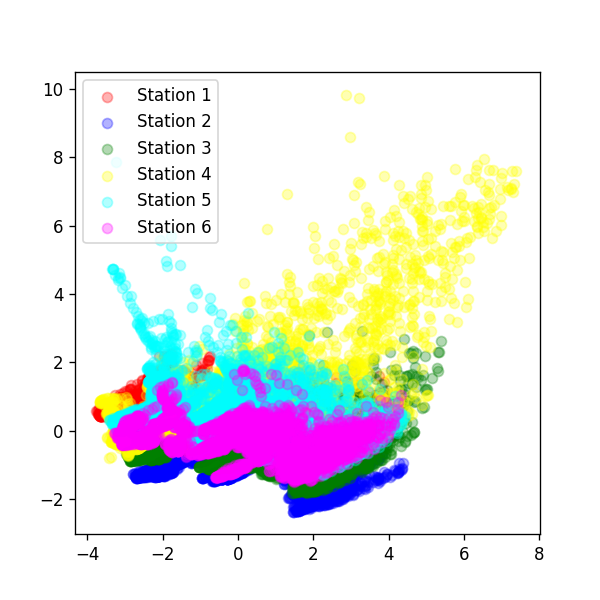

In [47]:
colors = [ 'red', 'blue', 'green', 'yellow', 'cyan', 'magenta' ]

fig, ax = pyplot.subplots( figsize=(5,5) )

for station_n in [1,2,3,4,5,6]: # Stations to be plotted

    dfq = df_projected[ df_projected[ 'Station' ]==station_n ]
    
    ax.scatter( dfq['PC 1'], dfq['PC 2'], color=colors[station_n-1], alpha=0.3, label='Station '+str(station_n) )
    
ax.legend()
pyplot.show()

<IPython.core.display.Javascript object>


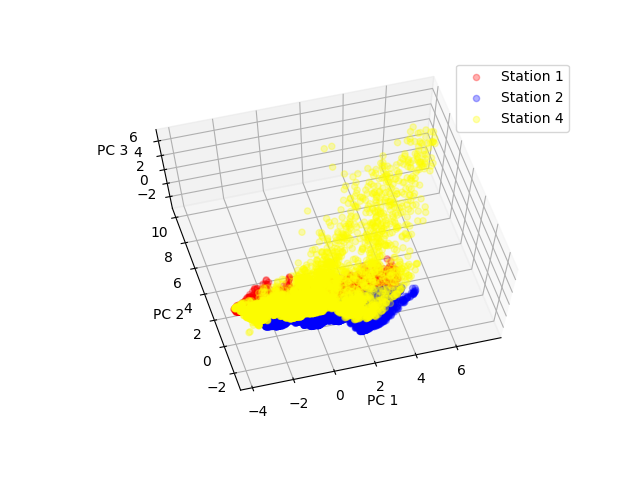

In [65]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

for station_n in [1,2,3,4,5,6]: # Stations to be plotted

    dfq = df_projected[ df_projected[ 'Station' ]==station_n ]

    x = dfq[ 'PC 1' ]
    y = dfq[ 'PC 2' ]
    z = dfq[ 'PC 3' ]

    ax.scatter(x, y, z, color=colors[station_n-1], alpha=0.3, label='Station '+str(station_n) )

    ax.set_xlabel( 'PC 1' )
    ax.set_ylabel( 'PC 2' )
    ax.set_zlabel( 'PC 3' )

ax.legend()

pyplot.show()